In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Resume.csv")

In [3]:
df.head()

,Filename,Text,Category
0,Internship_Ravali_Musquare Technologies (1).docx,Name: Ravali P \r\n\r\n ...,React JS Developer
1,Internship_Susovan Bag_Musquare Technologies.docx,\r\nSUSOVAN BAG \r\nSeeking a challengi...,React JS Developer
2,React Developer_Deepakreddy.docx,Kanumuru Deepak Reddy\r\n\r\n\r\n\r\nCAREER OB...,React JS Developer
3,React Developer_Haripriya.docx,HARIPRIYA BATTINA \r\nExperience as UI Develop...,React JS Developer
4,React Developer_Kamalakar Reddy.docx,KAMALAKAR REDDY. A \r\nLinked In: https://www....,React JS Developer


In [4]:
df.shape

(79, 3)

In [5]:
df.isnull().sum()

Filename    0
Text        0
Category    0
dtype: int64

In [6]:
df["Text"]= df["Text"].str.lower()

In [7]:
df.head()

,Filename,Text,Category
0,Internship_Ravali_Musquare Technologies (1).docx,name: ravali p \r\n\r\n ...,React JS Developer
1,Internship_Susovan Bag_Musquare Technologies.docx,\r\nsusovan bag \r\nseeking a challengi...,React JS Developer
2,React Developer_Deepakreddy.docx,kanumuru deepak reddy\r\n\r\n\r\n\r\ncareer ob...,React JS Developer
3,React Developer_Haripriya.docx,haripriya battina \r\nexperience as ui develop...,React JS Developer
4,React Developer_Kamalakar Reddy.docx,kamalakar reddy. a \r\nlinked in: https://www....,React JS Developer


In [8]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['Text'].apply(word_tokenize)


In [9]:
df['tokens']

0     [name, :, ravali, p, curriculum, vitae, specia...
1     [susovan, bag, seeking, a, challenging, positi...
2     [kanumuru, deepak, reddy, career, objective, :...
3     [haripriya, battina, experience, as, ui, devel...
4     [kamalakar, reddy, ., a, linked, in, :, https,...
                            ...                        
74    [workday, integration, consultant, name, :, sr...
75    [seeking, suitable, positions, in, workday, hc...
76    [workday, |, hcm, |, fcm, name, :, kumar, s.s,...
77    [venkateswarlu.b, workday, consultant, ., havi...
78    [vinay, kumar, .v, workday, functional, consul...
Name: tokens, Length: 79, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  79 non-null     object
 1   Text      79 non-null     object
 2   Category  79 non-null     object
 3   tokens    79 non-null     object
dtypes: object(4)
memory usage: 2.6+ KB


In [11]:
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_punctuation_and_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return filtered_tokens

df['filtered_tokens'] = df['tokens'].apply(remove_punctuation_and_stopwords)


In [12]:
df["filtered_tokens"]

0     [name, ravali, p, curriculum, vitae, specializ...
1     [susovan, bag, seeking, challenging, position,...
2     [kanumuru, deepak, reddy, career, objective, s...
3     [haripriya, battina, experience, ui, developer...
4     [kamalakar, reddy, linked, https, professional...
                            ...                        
74    [workday, integration, consultant, name, sri, ...
75    [seeking, suitable, positions, workday, hcm, t...
76    [workday, hcm, fcm, name, kumar, role, workday...
77    [workday, consultant, years, experience, years...
78    [vinay, kumar, workday, functional, consultant...
Name: filtered_tokens, Length: 79, dtype: object

In [13]:
from collections import Counter

# Flatten the list of tokens
all_tokens = [token for sublist in df['filtered_tokens'] for token in sublist]

# Count the frequency of each word
word_freq = Counter(all_tokens)

# Most common words
print(word_freq.most_common(10))

[('experience', 574), ('peoplesoft', 398), ('application', 385), ('using', 382), ('workday', 377), ('server', 331), ('reports', 316), ('data', 311), ('project', 273), ('business', 260)]


count      79.000000
mean      837.265823
std       551.611269
min       152.000000
25%       453.000000
50%       659.000000
75%      1094.000000
max      3032.000000
Name: text_length, dtype: float64


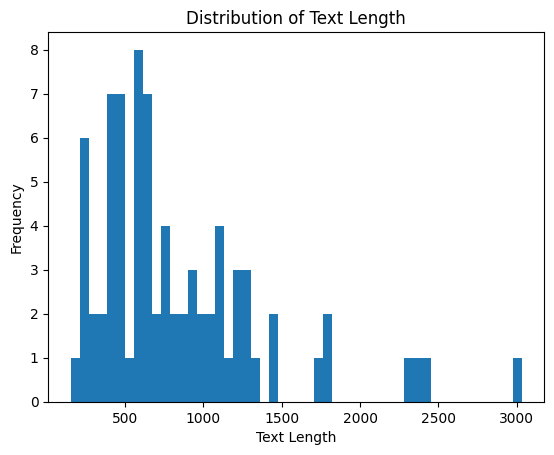

In [14]:
df['text_length'] = df['tokens'].apply(len)

# Summary statistics
print(df['text_length'].describe())

# Visualization
import matplotlib.pyplot as plt

plt.hist(df['text_length'], bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

In [15]:
from nltk.util import ngrams

def get_ngrams(tokens, n):
    return list(ngrams(tokens, n))

df['bigrams'] = df['filtered_tokens'].apply(lambda x: get_ngrams(x, 2))

# Flatten and count bigrams
all_bigrams = [bigram for sublist in df['bigrams'] for bigram in sublist]
bigram_freq = Counter(all_bigrams)

# Most common bigrams
print(bigram_freq.most_common(10))


[(('process', 'scheduler'), 104), (('sql', 'server'), 100), (('application', 'server'), 86), (('react', 'js'), 70), (('server', 'domains'), 70), (('people', 'tools'), 67), (('custom', 'reports'), 66), (('calculated', 'fields'), 65), (('workday', 'studio'), 64), (('web', 'server'), 58)]


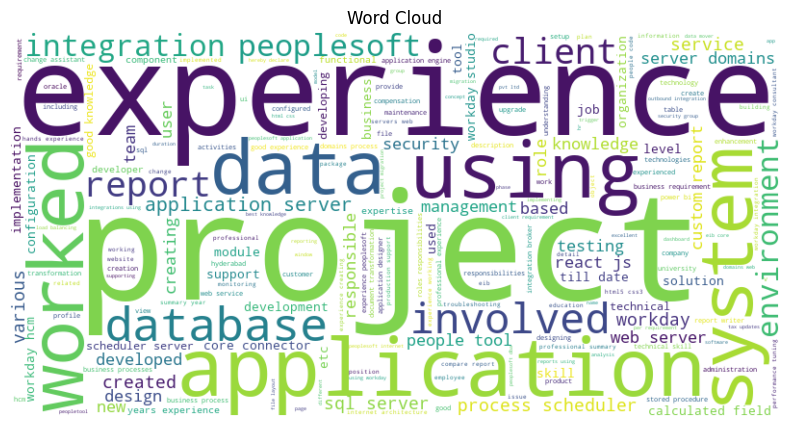

In [16]:
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [17]:
# Define a list of keywords related to skills or experiences
keywords = ['python', 'java', 'machine learning', 'data analysis', 'project management']

def count_keywords(text, keywords):
    keyword_count = {}
    for keyword in keywords:
        keyword_count[keyword] = text.lower().count(keyword)
    return keyword_count

df['keyword_counts'] = df['Text'].apply(lambda x: count_keywords(x, keywords))

# Summarize keyword counts
keyword_sum = {}
for keyword in keywords:
    keyword_sum[keyword] = df['keyword_counts'].apply(lambda x: x[keyword]).sum()

print(keyword_sum)


{'python': 3, 'java': 79, 'machine learning': 0, 'data analysis': 1, 'project management': 5}


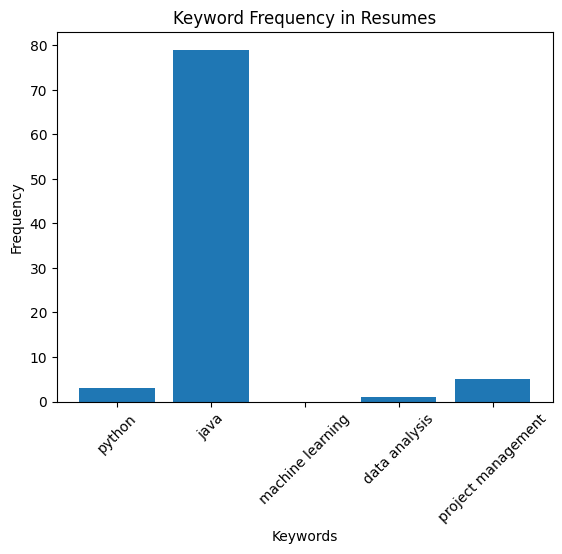

In [18]:
import matplotlib.pyplot as plt

plt.bar(keyword_sum.keys(), keyword_sum.values())
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Keyword Frequency in Resumes')
plt.xticks(rotation=45)
plt.show()


In [20]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download WordNet data
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmas = [lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag)) for token, tag in nltk.pos_tag(tokens)]
    return lemmas

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [22]:
df['lemmatized_tokens'] = df['filtered_tokens'].apply(lemmatize_tokens)


In [23]:
# Flatten the list of lemmatized tokens
all_lemmatized_tokens = [token for sublist in df['lemmatized_tokens'] for token in sublist]

# Count the frequency of each lemmatized word
lemmatized_word_freq = Counter(all_lemmatized_tokens)

# Most common lemmatized words
print(lemmatized_word_freq.most_common(10))


[('experience', 615), ('report', 500), ('application', 489), ('use', 482), ('server', 480), ('work', 473), ('peoplesoft', 398), ('workday', 377), ('integration', 354), ('create', 353)]
